In [ ]:
import sys
from pathlib import Path

# allow src folder to be imported from this notebook
module_path = str(Path.cwd().parents[0])
if module_path not in sys.path:
    sys.path.append(module_path)

In [1]:
import pandas as pd
from pathlib import Path

eda_msas = pd.read_csv("output/analysis-msa/stats_msas.tsv",sep="\t", index_col=False)
eda_msas.drop_duplicates(subset="path_msa", inplace=True,)
eda_msas.head(20)

,timestamp,path_msa,n_seqs,n_unique_seqs,n_identical_cols,n_cols,perc_identical_cols
0,Mon Dec 12 16:00:29 2022,/home/avila/data/msas/GC00003752_1.fa,7,3,996,1005,99.10
1,Mon Dec 12 16:00:29 2022,/home/avila/data/msas/GC00009796.fa,1,1,219,219,100.00
2,Mon Dec 12 16:00:29 2022,/home/avila/data/msas/Cluster_11982.fa,1,1,62,62,100.00
3,Mon Dec 12 16:00:29 2022,/home/avila/data/msas/GC00001810.fa,307,9,137,144,95.14
4,Mon Dec 12 16:00:29 2022,/home/avila/data/msas/Cluster_9951.fa,6,6,88,94,93.62
5,Mon Dec 12 16:00:29 2022,/home/avila/data/msas/Cluster_2401.fa,1,1,323,323,100.00
6,Mon Dec 12 16:00:29 2022,/home/avila/data/msas/GC00008350_2.fa,2,1,1095,1095,100.00
7,Mon Dec 12 16:00:29 2022,/home/avila/data/msas/Cluster_7604.fa,1,1,139,139,100.00
8,Mon Dec 12 16:00:29 2022,/home/avila/data/msas/GC00003065.fa,274,6,175,180,97.22
9,Mon Dec 12 16:00:29 2022,/home/avila/data/msas/GC00000813_4.fa,2,1,342,342,100.00


In [3]:
eda_msas.sort_values(by="n_cols", ascending=False)

,timestamp,path_msa,n_seqs,n_unique_seqs,n_identical_cols,n_cols,perc_identical_cols
24715,Mon Dec 12 16:04:54 2022,/home/avila/data/msas/GC00009303.fa,2,1,13377,13377,100.00
2408,Mon Dec 12 16:00:55 2022,/home/avila/data/msas/GC00000160_8.fa,1,1,12159,12159,100.00
15415,Mon Dec 12 16:03:14 2022,/home/avila/data/msas/GC00005508_1.fa,1,1,11046,11046,100.00
13603,Mon Dec 12 16:02:54 2022,/home/avila/data/msas/GC00002971_r1_r1_1.fa,103,48,6556,10695,61.30
20678,Mon Dec 12 16:04:11 2022,/home/avila/data/msas/GC00002971_18.fa,10,2,9753,9813,99.39
...,...,...,...,...,...,...,...
16549,Mon Dec 12 16:03:26 2022,/home/avila/data/msas/Cluster_14649.fa,2,1,30,30,100.00
16442,Mon Dec 12 16:03:25 2022,/home/avila/data/msas/Cluster_14699.fa,1,1,30,30,100.00
4044,Mon Dec 12 16:01:11 2022,/home/avila/data/msas/Cluster_14624.fa,9,1,30,30,100.00
17953,Mon Dec 12 16:03:40 2022,/home/avila/data/msas/Cluster_14641.fa,5,4,27,30,90.00


In [50]:
records = eda_msas.to_dict("records")
records[0]
info_msa = {}
feats = ["n_unique_seqs","n_cols"]
for record in records: 
    name_msa = Path(record["path_msa"]).stem
    info_msa[name_msa] = {feat: record[feat] for feat in feats}

In [39]:
import seaborn as sns
eda_msas[["n_unique_seqs","n_cols", "perc_identical_cols"]]

,n_unique_seqs,n_cols,perc_identical_cols
0,3,1005,99.10
1,1,219,100.00
2,1,62,100.00
3,9,144,95.14
4,6,94,93.62
...,...,...,...
37421,2,129,97.67
37422,1,1527,100.00
37425,6,87,93.10
37426,5,153,96.08


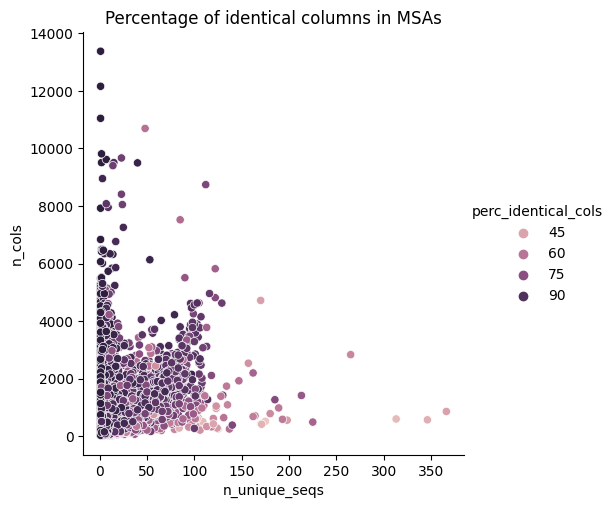

In [47]:
# percentage of identical columns vs (number of unique sequences and number of columns)
plot = sns.relplot(
    data=eda_msas, x="n_unique_seqs", y="n_cols", hue="perc_identical_cols",
    )
plot.set(title="Percentage of identical columns in MSAs")

In [ ]:
# 

___
### create panel for pBWT

In [5]:
# from pathlib import Path
# from Bio import AlignIO
# PATH_PANELS = Path("panels-pbwt-msa")
# PATH_PANELS.mkdir(exist_ok=True)

# filename = "/home/avila/data/msas/GC00002971_r1_r1_1.fa" # the largest panel
# name_msa = Path(filename).stem
# align = AlignIO.read(filename, "fasta")
# all_seqs = [str(record.seq) for record in align]
# seqs = list(set(all_seqs)) # removing duplicates

# with open(PATH_PANELS.joinpath(f"{name_msa}.txt"),"w") as fp: 
#     for seq in seqs[:-1]: 
#         fp.write(seq + "\n")
#     fp.write(seqs[-1])

___
### subsample msas for experimentation

In [92]:
# valid_msas = eda_msas.query("`n_unique_seqs`>1").copy()
# valid_msas.sort_values(by="n_cols", ascending=True, inplace=True, ignore_index=True)
# valid_msas["name_msa"] = valid_msas["path_msa"].apply(lambda path_msa: Path(path_msa).stem)

In [93]:
# subsample_msas = valid_msas. \
#     drop_duplicates(subset=["n_unique_seqs","n_cols"])["name_msa"].\
#     sample(n=1000, random_state=1).tolist()
# n= len(subsample_msas)
# with open("names_msas.txt", "w") as fp:
#     for j,name_msa in enumerate(subsample_msas):
#         fp.write(subsample_msas[-1]) if j == n-1 else fp.write(name_msa + "\n")

In [38]:
eda_msas.describe()

,n_seqs,n_unique_seqs,n_identical_cols,n_cols,perc_identical_cols
count,37423.000000,37423.000000,37423.000000,37423.000000,37423.000000
mean,52.208562,8.711835,520.590305,550.403495,95.766866
std,97.350875,17.090313,596.563078,635.772178,6.938166
min,1.000000,1.000000,25.000000,30.000000,30.770000
25%,1.000000,1.000000,169.000000,177.000000,93.230000
50%,4.000000,2.000000,312.000000,327.000000,99.800000
75%,40.000000,6.000000,692.000000,738.000000,100.000000
max,2352.000000,366.000000,13377.000000,13377.000000,100.000000


In [41]:
eda_msas.sort_values(by=["n_cols","n_unique_seqs"], ascending=False).head(20)

,timestamp,path_msa,n_seqs,n_unique_seqs,n_identical_cols,n_cols,perc_identical_cols
24715,Mon Dec 12 16:04:54 2022,/home/avila/data/msas/GC00009303.fa,2,1,13377,13377,100.00
2408,Mon Dec 12 16:00:55 2022,/home/avila/data/msas/GC00000160_8.fa,1,1,12159,12159,100.00
15415,Mon Dec 12 16:03:14 2022,/home/avila/data/msas/GC00005508_1.fa,1,1,11046,11046,100.00
13603,Mon Dec 12 16:02:54 2022,/home/avila/data/msas/GC00002971_r1_r1_1.fa,103,48,6556,10695,61.30
20678,Mon Dec 12 16:04:11 2022,/home/avila/data/msas/GC00002971_18.fa,10,2,9753,9813,99.39
6558,Mon Dec 12 16:01:38 2022,/home/avila/data/msas/GC00003866_4.fa,70,23,7956,9669,82.28
20646,Mon Dec 12 16:04:11 2022,/home/avila/data/msas/GC00000082_5.fa,16,7,9609,9618,99.91
29360,Mon Dec 12 16:05:46 2022,/home/avila/data/msas/GC00003866_3.fa,35,15,8651,9507,91.00
8173,Mon Dec 12 16:01:55 2022,/home/avila/data/msas/GC00002971_11.fa,4,2,9446,9507,99.36
21956,Mon Dec 12 16:04:25 2022,/home/avila/data/msas/GC00000082_7.fa,88,40,9197,9498,96.83


In [26]:
eda_msas.describe()

,n_seqs,n_unique_seqs,n_identical_cols,n_cols,perc_identical_cols
count,52266.000000,52266.000000,52266.000000,52266.000000,52266.000000
mean,52.435599,8.735679,521.582999,551.462691,95.757161
std,97.826216,17.202685,600.340150,639.968664,6.951414
min,1.000000,1.000000,25.000000,30.000000,30.770000
25%,1.000000,1.000000,169.000000,177.000000,93.220000
50%,4.000000,2.000000,313.000000,328.000000,99.790000
75%,40.000000,6.000000,692.000000,738.000000,100.000000
max,2352.000000,366.000000,13377.000000,13377.000000,100.000000


## Analysis experiment
Algorithm for computing maximal blocks has changed


In [24]:
import pandas as pd
from pathlib import Path

In [25]:
# time max blocks
def load_times(name_msa):
    path_times = [f"output-exp/block_decomposition/{name_msa}.txt",f"output-exp/max_blocks/{name_msa}.txt"]
    times = {}

    for path_time in path_times:
        with open(path_time) as fp:
            for line in fp.readlines():
                name, time = line.replace("\n","").split("\t")
                times[name] = float(time)
    
    return times


### old experiments
- `y`: maximal blocks from sub-alignments
- `x`: maximal blocks from the MSA

In [26]:
# old_experiments = pd.read_csv("../data/output-old-experiments.tsv", sep="\t")
# old_experiments["name_msa"] = old_experiments["path_msa"].apply(lambda path_msa: Path(path_msa).stem)
# old_experiments.columns

### regarding maximal blocks
- `total_blocks`: number of maximal blocks in the MSA
- `blocks_with_overlap`: blocks with at least one overlap
- `inter_between_blocks`: number of intersections between pairs of blocks (that has to be decomposed)

In [27]:
# maximal blocks
stats_max_blocks = pd.concat(
                            [pd.read_csv(csv, sep="\t", index_col=False) for csv in Path("output-exp/max_blocks/stats").rglob("*.tsv")],
                            axis=0
                            )
stats_max_blocks["name_msa"] = stats_max_blocks["filename"].apply(lambda filename: Path(filename).stem)
stats_max_blocks.rename({"total_blocks": "n_max_blocks"}, axis=1, inplace=True)
stats_max_blocks

,timestamp,filename,n_max_blocks,blocks_with_overlap,inter_between_blocks,name_msa
0,Mon Dec 12 23:25:19 2022,output-exp/max_blocks/GC00003442.json,325,325,2935,GC00003442
0,Mon Dec 12 23:25:02 2022,output-exp/max_blocks/GC00001776.json,507,507,7217,GC00001776
0,Mon Dec 12 23:29:47 2022,output-exp/max_blocks/GC00008358.json,75,75,79,GC00008358
0,Mon Dec 12 23:29:56 2022,output-exp/max_blocks/GC00004692_3.json,7,0,0,GC00004692_3
0,Mon Dec 12 23:29:20 2022,output-exp/max_blocks/GC00005351.json,114,86,194,GC00005351
...,...,...,...,...,...,...
0,Mon Dec 12 23:29:58 2022,output-exp/max_blocks/Cluster_6409.json,14,11,16,Cluster_6409
0,Mon Dec 12 23:29:13 2022,output-exp/max_blocks/Cluster_11341.json,29,29,114,Cluster_11341
0,Mon Dec 12 23:29:44 2022,output-exp/max_blocks/Cluster_10277.json,5,5,5,Cluster_10277
0,Mon Dec 12 23:27:17 2022,output-exp/max_blocks/Cluster_1250.json,265,265,5051,Cluster_1250


### regarding times
The computation of maximal blocks is as follow: 
1. create a suffix tree as suggested in Alanko's paper
2. find maximal repeats, which will be positional strings for us
3. map the positional strings back to the MSA to identify the maximal blocks
4. decompose the set of maximal blocks to find the set $\mathcal{B}$

then, the reported times are: 
- `t_pos_string`: time to compute positional strings (step 1)
- `t_max_blocks`: time to find maximal blocks (step 2)
- `t_decomp_blocks`: time to decompose pairs of blocks (step 3)

In [28]:
# block decomposition
stats_block_decomp = pd.concat(
                            [pd.read_csv(csv, sep="\t", index_col=False) for csv in Path("output-exp/block_decomposition/stats").rglob("*.tsv")],
                            axis=0
                            )
stats_block_decomp["name_msa"] = stats_block_decomp["filename"].apply(lambda filename: Path(filename).stem)
stats_block_decomp[["t_decomp_blocks","t_pos_string","t_max_blocks"]] = stats_block_decomp["name_msa"].apply(
    lambda name_msa: pd.Series(load_times(name_msa)))

# to avoid confusion with the total of maximal blocks in stats_max_blocks
stats_block_decomp.rename({"total_blocks": "size_set_B"}, axis=1, inplace=True)

In [29]:
## compare
# cols_old = ["name_msa","n_unique_seqs_x","n_seqs_x","n_cols_x","t_x","t_y"] # old experiments
cols_smb = ["name_msa","n_max_blocks","blocks_with_overlap","inter_between_blocks"] # stats max blocks
cols_sbd = ["name_msa","size_set_B","t_pos_string","t_max_blocks","t_decomp_blocks"]
stats_new_exp = pd.merge(stats_max_blocks[cols_smb],stats_block_decomp[cols_sbd], on="name_msa")

In [30]:
stats_exp = pd.merge(stats_max_blocks[cols_smb], stats_block_decomp[cols_sbd], on="name_msa")

In [31]:
stats_exp.describe()[["n_max_blocks","blocks_with_overlap","inter_between_blocks","size_set_B","t_pos_string","t_max_blocks","t_decomp_blocks"]]

,n_max_blocks,blocks_with_overlap,inter_between_blocks,size_set_B,t_pos_string,t_max_blocks,t_decomp_blocks
count,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000
mean,448.650602,443.528112,5513.477912,3254.122490,26.109915,0.026695,0.633518
std,723.731724,722.466028,10170.407091,5854.559787,73.959734,0.057084,1.255454
min,1.000000,0.000000,0.000000,1.000000,0.009100,0.000000,0.000241
25%,33.000000,29.000000,79.000000,107.750000,0.778925,0.000300,0.007849
50%,134.500000,132.000000,777.000000,660.000000,3.697600,0.002450,0.071468
75%,575.750000,566.500000,6705.750000,3838.750000,20.803250,0.026525,0.678849
max,7098.000000,7056.000000,88147.000000,61226.000000,1231.620500,0.685400,10.532577


## Plots

In [57]:
df_plots=pd.concat([stats_exp, stats_exp["name_msa"].apply(lambda name_msa: pd.Series(info_msa[name_msa]))], axis=1)    

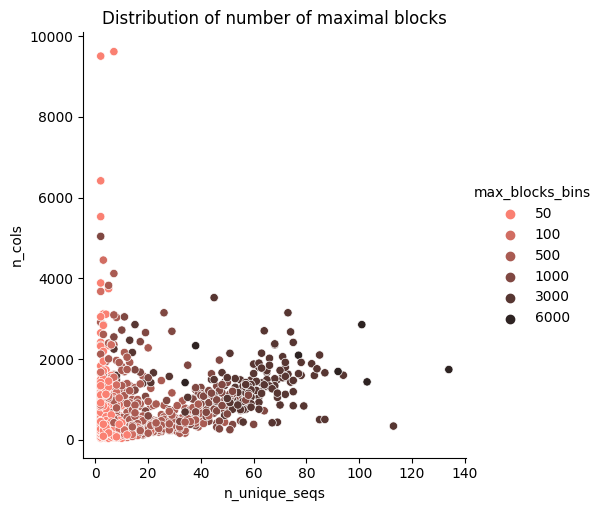

In [68]:
# percentage of identical columns vs (number of unique sequences and number of columns)
levels=[0,50,100,500,1000,3000,6000]
df_plots["max_blocks_bins"] = pd.cut(df_plots["n_max_blocks"], 
                                bins=levels, 
                                labels=[l for l in levels[1:]])
plot = sns.relplot(
    data=df_plots, x="n_unique_seqs", y="n_cols", hue="max_blocks_bins", palette=sns.color_palette("dark:salmon_r")
    )
plot.set(title="Distribution of number of maximal blocks")

### Distribution of the size of the blocks
Plot the distribution of the maximal blocks in 
- one MSA
- a set of MSAs
The idea is to see how large are the maximal blocks

In [87]:
import json
from src.blocks import Block
from collections import namedtuple 

size_and_len = namedtuple("SizeLen", ["id_block","size","len"])

path_max_blocks = Path("/home/avila/pangeblocks/output2/max_blocks/GC00002971_r1_r1_1.json")

# load max blocks
with open(path_max_blocks) as fp: 
    max_blocks = json.load(fp)
max_blocks = [Block(*block) for block in max_blocks]
len(max_blocks)

# get size (of set K) and length (of string: j-i+1)
sl = []
for j, block in enumerate(max_blocks): 
    size_block = len(block.K)
    len_block  = block.j - block.i + 1
    sl.append( size_and_len(j, size_block, len_block) )

# 1. For one MSA

# 2. For a set of MSAs

[Text(0.5, 1.0, 'distribution of max blocks in an MSA')]

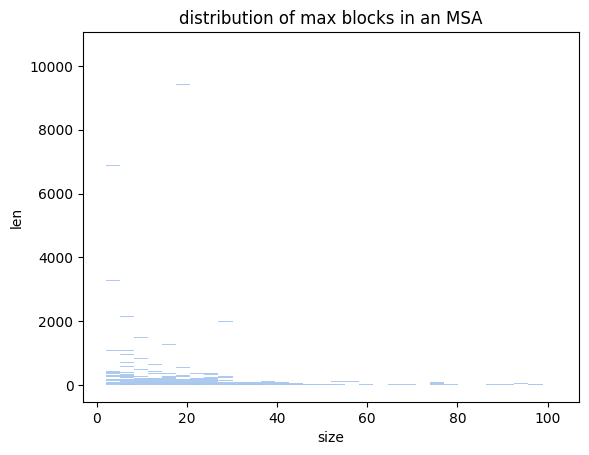

In [93]:
data = pd.DataFrame(sl)
hist_max_block = sns.histplot(data=data, x="size", y="len", stat="density")
hist_max_block.set(title="distribution of max blocks in an MSA")

In [51]:
# stats_old_exp = old_experiments[cols_old].rename({
#     "t_x": "t_max_blocks_msa",
#     "t_y": "t_max_blocks_sub",
#     "n_unique_seqs_x": "n_unique_seqs",
#     "n_seqs_x": "n_seqs_msa",
#     "n_cols_x": "n_cols_msa"

# }, axis=1)

In [52]:
# comparison = pd.merge(stats_old_exp, stats_new_exp, on="name_msa")

In [32]:
# time to compute maximal blocks
# old time / new time
# comparison["t_max_blocks_old_over_new"] = comparison.apply(lambda row: row["t_max_blocks_msa"] / (row["t_max_blocks"] + row["t_pos_string"]) ,axis=1)  

In [33]:
# max_ncols = comparison["n_cols_msa"].max()
# comparison.query(f"`n_cols_msa`=={max_ncols}")

In [34]:
# max_nrows = comparison["n_unique_seqs"].max()
# comparison.query(f"`n_unique_seqs`=={max_nrows}")

In [35]:
# ## sizes
# comparison[["n_unique_seqs","n_seqs_msa","n_cols_msa","total_blocks","size_set_B"]].describe()